# Matplotlib

MatPlotLib fonctionne avec Python. Tu pourrais tracer des graphiques à partir de listes, de dictionnaires, ou d'arrays NumPy. Dans la pratique, tu utiliseras souvent des DataFrames Pandas.
PyPlot est un module de MatPlotLib. Tu utiliseras exclusivement PyPlot. La convention est de renommer PyPlot avec l'alias `plt`.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path = "https://raw.githubusercontent.com/matplotlib/sample_data/master/aapl.csv"
df = pd.read_csv(path, nrows=365)
df.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26


## Premier Graphique

Le principe de la syntaxe de MatPlotLib est le suivant :

1. Tu choisis la fonction correspondant au graphique que tu veux réaliser. Par exemple scatter pour un nuage de points, ou bar pour un graphique en barres.
2. Tu définis les abscisses (x) et les ordonnées (y)
3. Tu indiques à PyPlot d'afficher le graphique avec `plt.show()`

Ici, nous traçons un graphique avec la colonne 1 en abscisse et la colonne 2 en ordonnée.

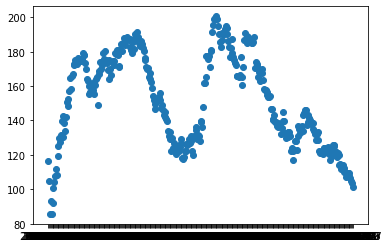

In [11]:
plt.scatter(x = df["Date"], y = df["Open"] )
plt.show()


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

**Voici les différents types de graphs possibles sur Matplotlib :**

https://matplotlib.org/stable/plot_types/index.html 

## Formes et Couleurs

Tu peux modifier les couleurs en utilisant le paramètre `color` ou `c` suivant les graphiques. Tu peux aussi modifier le type de marqueur avec le paramètre `marker`.

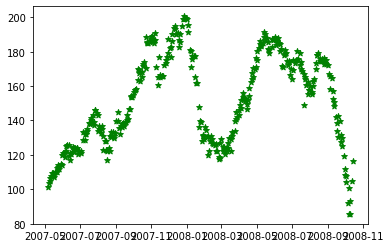

In [27]:
plt.scatter(x = df["Date"], y = df["Open"], color = "green", marker = "*" )
plt.show()

Dans MatPlotLib, **tout est paramétrable**. Ca fait un énorme nombre de fonctions et paramètres. Ca ne sert donc à rien de tout retenir, il vaut mieux aller lire la documentation suivant les besoins. Voici quelques ressources utiles :

**Liste des marqueurs**

https://matplotlib.org/api/markers_api.html



**Liste des couleurs**

https://matplotlib.org/stable/gallery/color/named_colors.html 


**Des dizaines d'exemples de graphiques**

Tu peux réutiliser le code de chaque graphique. Attention, ce site référence aussi des graphiques tracés avec Seaborn, une autre bibliothèque que tu verras bientôt. Pour l'instant, reste concentré sur MatPlotLib.

https://python-graph-gallery.com/

## Graphiques empilés

Tu peux superposer deux graphiques, simplement en définissant deux graphiques avant d'indiquer `plt.show()`



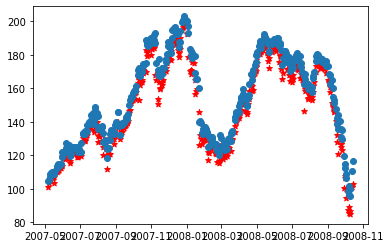

In [28]:
plt.scatter(x = df["Date"], y = df["Low"], color = "red", marker = "*" )
plt.scatter(x = df["Date"], y = df["High"])
plt.show()

Tu peux aussi superposer des graphiques différents :

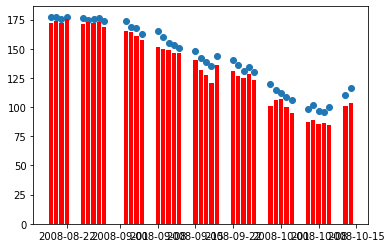

In [29]:
df2 = df.iloc[:40]
plt.scatter(x = df2["Date"], y = df2["High"])
plt.bar(x = df2["Date"], height = df2["Low"], color = "red")
plt.show()

## Graphiques côte à côte


Pour afficher plusieurs graphiques côte à côte, voici les étapes :

1. Tu définis une **figure** avec la fonction `subplots` au pluriel (car elle contiendra plusieurs graphiques)
2. Tu définis ensuite chacun des graphiques, comme dans le chapitre précédent. Chaque graphique est un `subplot` au singulier.
3. Tu affiches la figure

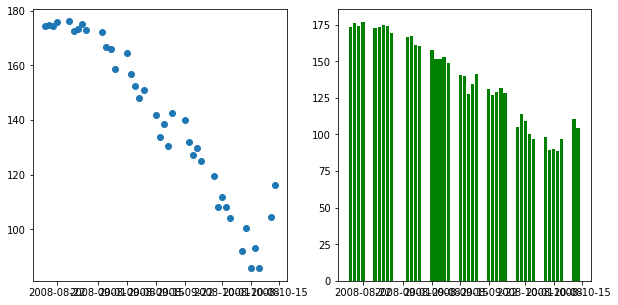

In [30]:
# Définition de la figure
# Le paramètre figsize permet de définir la largeur et la hauteur de la figure
fig, ax = plt.subplots(figsize = (10,5))

# Définition du premier graphique
ax1 = plt.subplot(121) 
ax1.scatter(x = df2["Date"], y = df2["Open"])

# Définition du second graphique
ax2 = plt.subplot(122) 
ax2.bar(x = df2["Date"], height = df2["Close"], color = "green")

plt.show()

**Comment sait-on quel subplot est celui de gauche ?**

A chaque définition de subplot, tu indiques un numéro à 3 chiffres :

- le nombre de lignes
- le nombre de colonnes
- la position du graphique, en comptant de gauche à droite puis de haut en bas


Ainsi si on change en 2 lignes et un colonne, nous obtenons cela :



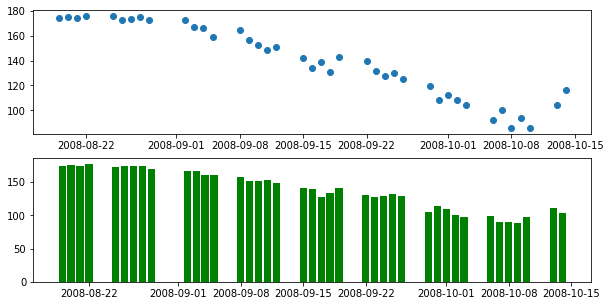

In [31]:
# Définition de la figure
# Le paramètre figsize permet de définir la largeur et la hauteur de la figure
fig, ax = plt.subplots(figsize = (10,5))

# Définition du premier graphique
ax1 = plt.subplot(211) 
ax1.scatter(x = df2["Date"], y = df2["Open"])

# Définition du second graphique
ax2 = plt.subplot(212) 
ax2.bar(x = df2["Date"], height = df2["Close"], color = "green")

plt.show()

Voici un rappel du fonctionnement :

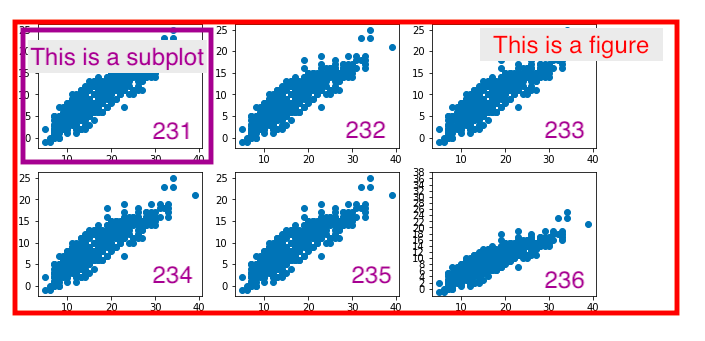

**Tu trouveras parfois cette seconde syntaxe, équivalente**



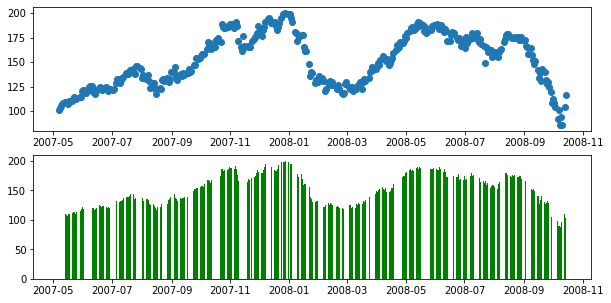

In [34]:
# Définition de la figure en indiquant le nombre de lignes et de colonnes
fig, ax = plt.subplots(figsize = (10,5), nrows= 2, ncols = 1)

# Définition du premier graphique
ax[0].scatter(x = df["Date"], y = df["Open"])

# Définition du second graphique
ax[1].bar(x = df["Date"], height = df["Close"], color = "green")

plt.show()

## Titre, axes et légendes

Tout est personnalisable avec MatPlotLib, donc la syntaxe est immense. Quelques précisions en commentaire dans le code.

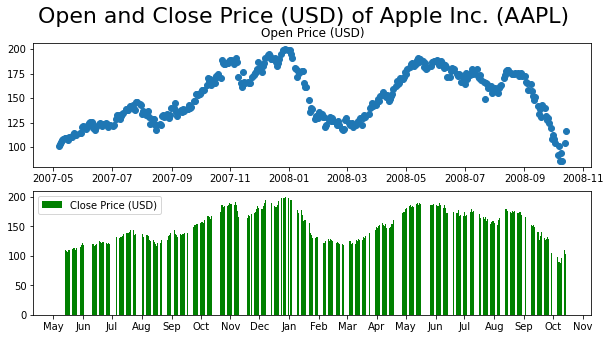

In [45]:
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize = (10,5))
# On peut ajouter un titre à la figure
# Il existe énormément de paramètres (police, couleur, italique, etc...)
# Ici nous utilisons "size" pour la taille
fig.suptitle("Open and Close Price (USD) of Apple Inc. (AAPL)", size = 22)


# Définition du premier graphique
ax1 = plt.subplot(211) 
ax1.scatter(x = df["Date"], y = df["Open"])

# On peut ajouter un titre à chacun des graphiques
ax1.set_title("Open Price (USD)")


# Définition du second graphique
ax2 = plt.subplot(212) 
ax2.bar(x = df["Date"], height = df["Close"], color = "green")

# On peut définir la fréquences des "ticks" sur chacun des axes
ax2.xaxis.set_major_locator(mdates.MonthLocator())

# Et le format des ticks
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Et ajouter une légende
ax2.legend(['Close Price (USD)'])

plt.show()

Pour résumer :

- matplotlib - accès "low level" à la librairie de visualisation. Utile si vous souhaitez créer votre propre librairie de visualisation python ou faire des choses très custom.
- matplotlib.pyplot - interface proche de celle de Matplab pour produire vos graphes

La structure des objets décrits par l'API est très hiérarchique, comme illustré par ce schéma :

- "Figure" contient l'ensemble de la représentation visuelle. C'est par exemple grâce à cette méta-structure que l'on peut facilement ajouter un titre à une représentation qui contiendrait plusieurs graphes ;
- "Axes" (ou "Subplots") décrit l'ensemble contenant un ou pusieurs graphes (correspond à l'objet subplot et aux méthodes add_subplot)
- "Axis" correspond aux axes d'un graphique (ou instance de subplot) donné.

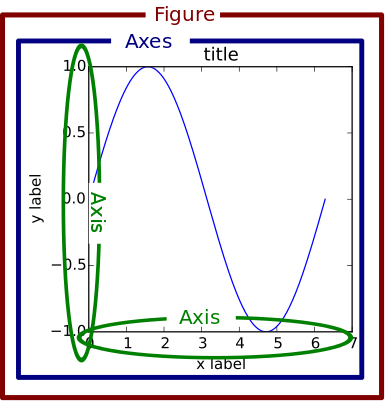

Une dernière remarque d'ordre général : [pyplot est une machine à état](https://en.wikipedia.org/wiki/Matplotlib). Cela implique que les méthodes pour tracer un graphe ou éditer un label s'appliquent par défaut au dernier état en cours (dernière instance de subplot ou dernière instance d'axe par exemple).

Conséquence : il faut concevoir ses codes comme une séquence d'instructions (par exemple, il ne faut pas séparer les instructions qui se rapportent au même graphique dans deux cellules différentes du Notebook).

## Ressources

**Quelques excellentes cheatsheets**

Cheatsheet beginner, à consulter absolument

https://camo.githubusercontent.com/b1b8838502a81077591ccadbf45dc45f2207637b41245e557198b680b0a2e662/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f68616e646f75742d626567696e6e65722e706e67

<br>
Cheatsheet intermédiaire

https://camo.githubusercontent.com/fc055a0d3897e7aec7ec66fc1d7f70cfb2873f82eb5be4ea977286a1cf08fa74/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f68616e646f75742d696e7465726d6564696174652e706e67

<br>
Cheatsheet Advanced 

https://camo.githubusercontent.com/fc055a0d3897e7aec7ec66fc1d7f70cfb2873f82eb5be4ea977286a1cf08fa74/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f68616e646f75742d696e7465726d6564696174652e706e67


<br>
Tips & Tricks

https://camo.githubusercontent.com/62a744e98372f7aaad377cf1f535dcc10117ff196c876102682b03ca4759f420/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f68616e646f75742d746970732e706e67

<br>
Les couleurs & Légendes 

https://camo.githubusercontent.com/8566d191963c2ada58246241d19a1252c519edea1ecf4049f5bc939e302e36a8/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f63686561747368656574732d322e706e67


### Exemple : Fonction génération de CA aleatoire + *matplolib*

In [1]:
import random

def generate_chiffre_affaire():
    #La fonction generate_chiffre_affaire utilise la bibliothèque random pour générer des chiffres d'affaires aléatoires. On commence par créer une liste de mois pour lesquels les données de chiffre d'affaire seront générées.
    mois = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc']
    chiffres_affaire = []
    #Ensuite, la fonction génère 12 chiffres d'affaire aléatoires à l'aide de la méthode randint de la bibliothèque random qui retourne un entier aléatoire entre les bornes spécifiées (ici, entre 10 000 et 100 000). 
    #Les chiffres d'affaires sont stockés dans une liste chiffres_affaire.
    for i in range(12):
        chiffres_affaire.append(random.randint(10000, 100000))
    return mois, chiffres_affaire
    # La fonction retourne ensuite les listes de mois et de chiffres d'affaire générées.

In [2]:
#@title
mois, chiffres_affaire = generate_chiffre_affaire()
print(mois)
print(chiffres_affaire)

['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc']
[14310, 81549, 78103, 10922, 86339, 57171, 74979, 49378, 71391, 49663, 73044, 51420]


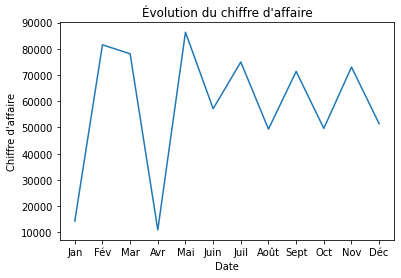

In [3]:
#@title
import matplotlib.pyplot as plt

# Données de chiffre d'affaire 
dates = mois
montants =  chiffres_affaire

# Création de la figure et des axes
fig, ax = plt.subplots()

# Tracé de la ligne
ax.plot(dates, montants)

# Ajout d'un titre et de labels pour les axes
ax.set_title("Évolution du chiffre d'affaire")
ax.set_xlabel("Date")
ax.set_ylabel("Chiffre d'affaire")

# Affichage du graphique
plt.show()